In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
stock_data=pd.read_csv('..\\datasets\\Stock-Price-Forecasting\\stocks.csv')

In [3]:
print(stock_data.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


In [4]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

In [5]:
stock_data.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
stock_data['Ticker'].value_counts()

Ticker
AAPL    62
MSFT    62
NFLX    62
GOOG    62
Name: count, dtype: int64

In [7]:
tickers=stock_data['Ticker'].unique()

In [8]:
time_range=stock_data['Date'].min(),stock_data['Date'].max()
print(time_range)

(Timestamp('2023-02-07 00:00:00'), Timestamp('2023-05-05 00:00:00'))


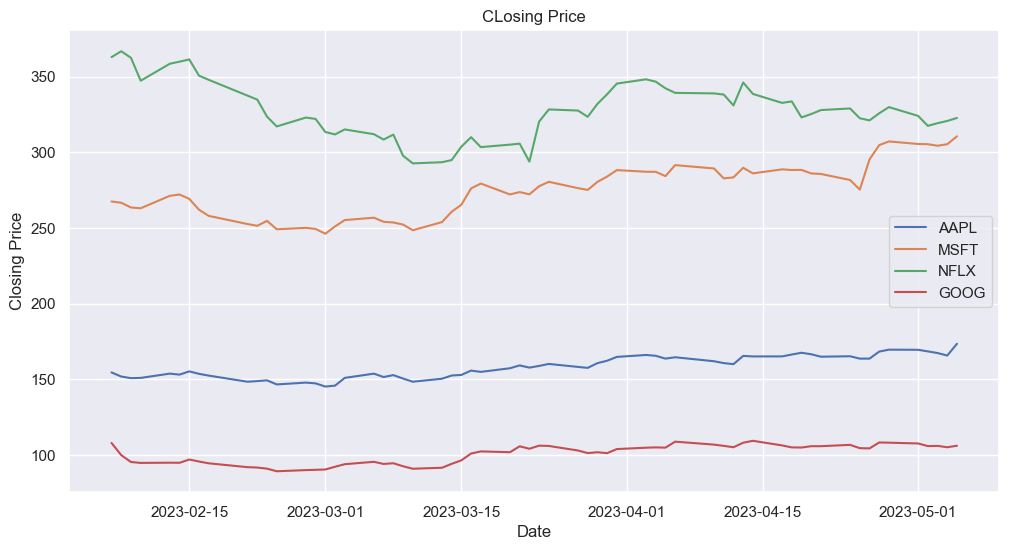

In [9]:
fig,ax=plt.subplots(figsize=(12,6))
for ticker in tickers:
    subset=stock_data[stock_data['Ticker']==ticker]
    ax.plot(subset['Date'],subset['Close'],label=ticker)
ax.set_title('CLosing Price')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()
plt.show()

In [10]:
stock_data.groupby('Ticker')['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


In [11]:
pivot_data=stock_data.pivot(index='Date',columns='Ticker',values='Close')

In [12]:
#stock_data.set_index('Date',inplace=True)
temp=pd.DataFrame()
temp.index=stock_data.index
temp['AAPL']=stock_data[stock_data['Ticker']=='AAPL']['Close']
for stock in stock_data.Ticker.unique():
    temp[stock]=stock_data[stock_data['Ticker']==stock]['Close']

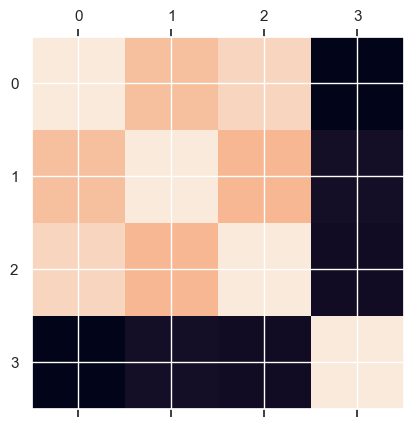

In [13]:
c=pivot_data.corr()
plt.matshow(c)
plt.show()

In [14]:
c.style.background_gradient(cmap='BrBG',axis=None)

Ticker,AAPL,GOOG,MSFT,NFLX
Ticker,,,,
AAPL,1.000000,0.901662,0.953037,0.154418
GOOG,0.901662,1.000000,0.884527,0.201046
MSFT,0.953037,0.884527,1.000000,0.191273
NFLX,0.154418,0.201046,0.191273,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

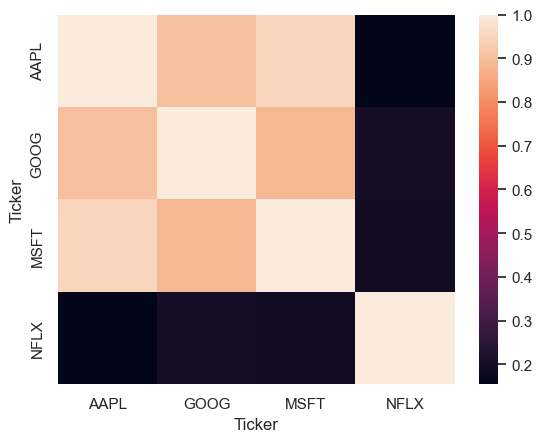

In [15]:
sns.heatmap(c)

In [16]:
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
start_date=pd.to_datetime('2023-1-1')
end_date=pd.to_datetime('today')
tickers=['AAPL','MSFT','GOOG','TSLA','IBM','NFLX']
multi_data=yf.download(tickers,start=start_date,end=end_date,interval="1d")

[*********************100%%**********************]  6 of 6 completed


In [18]:
multi_data.head()

Price        Adj Close                                                 \
Ticker            AAPL       GOOG         IBM        MSFT        NFLX   
Date                                                                    
2023-01-03  124.048042  89.699997  133.634216  236.609222  294.950012   
2023-01-04  125.327507  88.709999  134.625488  226.259171  309.410004   
2023-01-05  123.998444  86.769997  133.218811  219.553360  309.700012   
2023-01-06  128.560852  88.160004  135.663971  222.140869  315.549988   
2023-01-09  129.086533  88.800003  135.522369  224.303726  315.170013   

Price                        Close                                     ...  \
Ticker            TSLA        AAPL       GOOG         IBM        MSFT  ...   
Date                                                                   ...   
2023-01-03  108.099998  125.070000  89.699997  141.550003  239.580002  ...   
2023-01-04  113.639999  126.360001  88.709999  142.600006  229.100006  ...   
2023-01-05  110.339996  125.019997  86.769997  141.110001  222.309998  ...   
2023-01-06  113.059998  129.619995  88.160004  143.699997  224.929993  ...   
2023-01-09  119.769997  130.149994  88.800003  143.550003  227.119995  ...   

Price             Open                                         Volume  \
Ticker             IBM        MSFT        NFLX        TSLA       AAPL   
Date                                                                    
2023-01-03  141.100006  243.080002  298.059998  118.470001  112117500   
2023-01-04  142.070007  232.279999  298.239990  109.110001   89113600   
2023-01-05  142.440002  227.199997  307.000000  110.510002   80962700   
2023-01-06  142.380005  223.000000  311.570007  103.000000   87754700   
2023-01-09  144.080002  226.449997  316.829987  118.959999   70790800   

Price                                                        
Ticker          GOOG      IBM      MSFT     NFLX       TSLA  
Date                                                         
2023-01-03  20738500  3338600  25740000  6764000  231402800  
2023-01-04  27046500  3869200  50623400  9345100  180389000  
2023-01-05  23136100  2866600  39585600  8328400  157986300  
2023-01-06  26612600  3574000  43613600  8959800  220911100  
2023-01-09  22996700  3987700  27369800  6766600  190284000  

[5 rows x 36 columns]

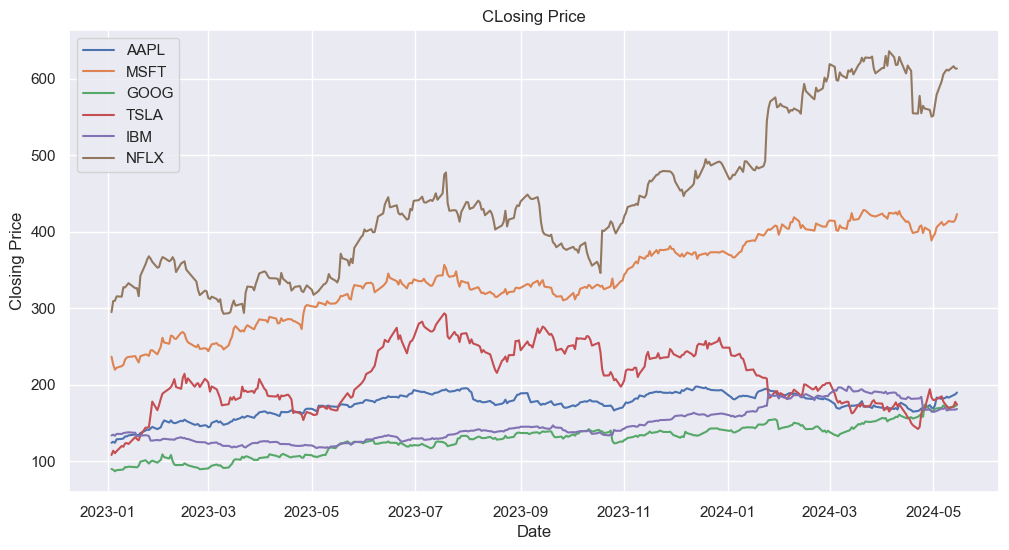

In [19]:
fig,ax=plt.subplots(figsize=(12,6))
for ticker in tickers:
    subset=multi_data['Adj Close'][ticker]
    ax.plot(subset,label=ticker)
ax.set_title('CLosing Price')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()
plt.show()

In [20]:
apple_df=multi_data['Adj Close']['TSLA'].iloc[-90:]

In [21]:
apple_df=apple_df.resample('d').ffill()

<Figure size 640x480 with 0 Axes>

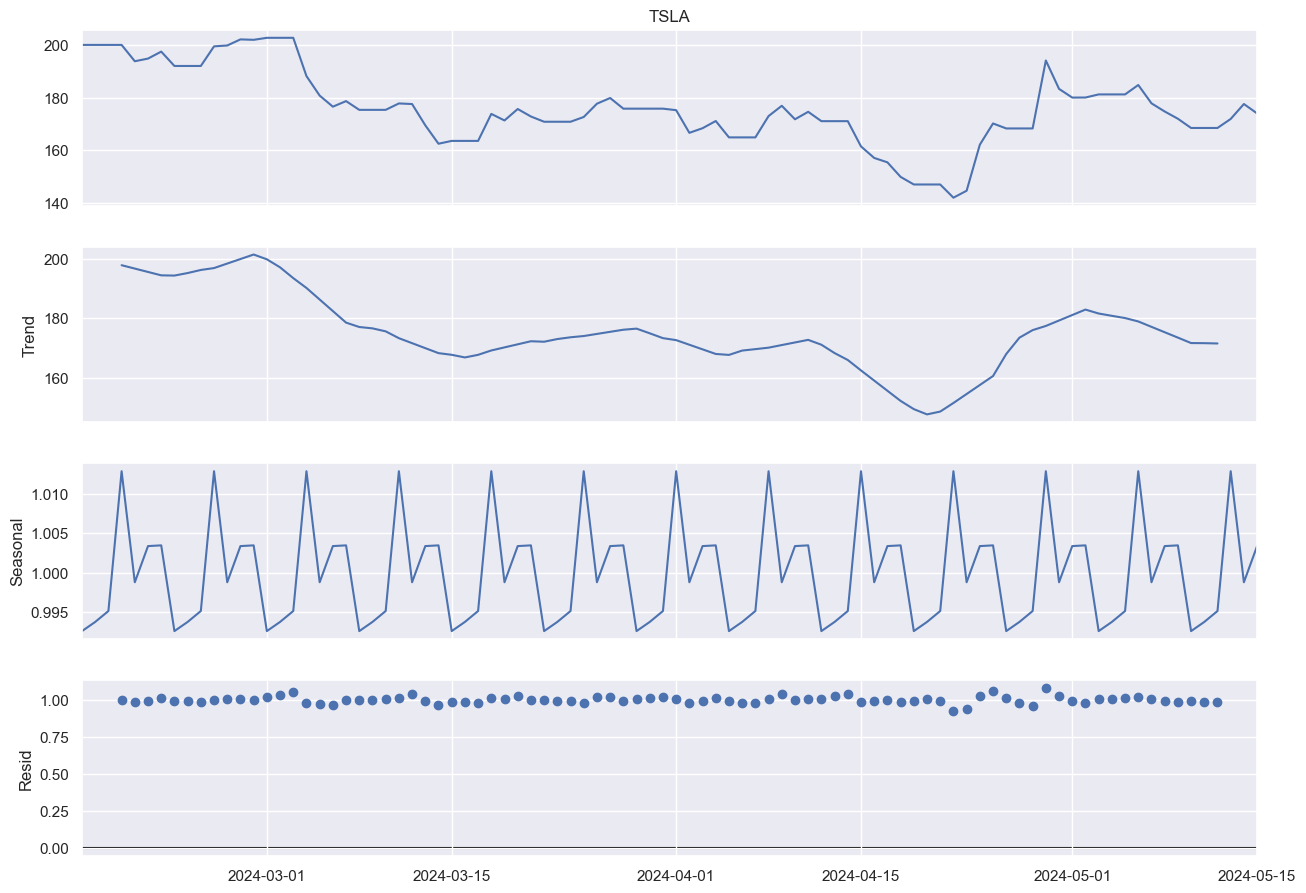

In [22]:
result = seasonal_decompose(apple_df[-90:], 
                            model='multiplicative')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

In [23]:
apple_df_diff=apple_df.diff().dropna()

<Axes: xlabel='Date'>

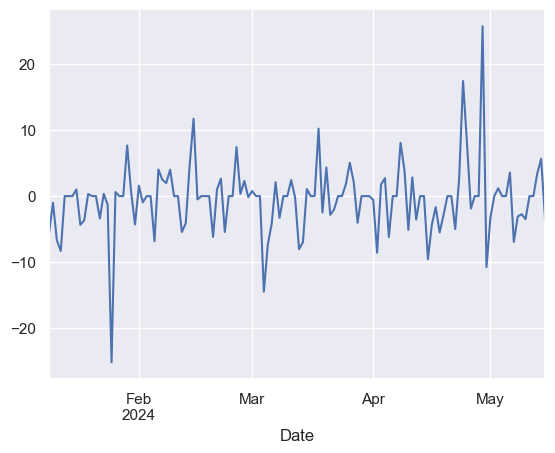

In [24]:
apple_df_diff.plot()

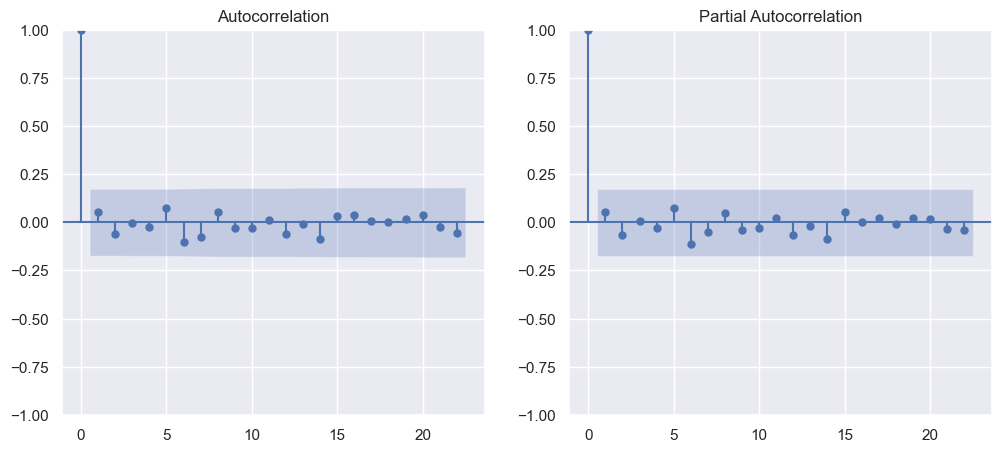

In [25]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
plot_acf(apple_df_diff,axes[0])
plot_pacf(apple_df_diff,axes[1])
plt.show()

In [26]:
#arima_model=ARIMA(apple_df,order=(1,1,1),seasonal_order=(1,1,1,7))
#arima_model_fit=arima_model.fit()
sarima_model=SARIMAX(apple_df,order=(1,1,1),seasonal_order=(1,1,1,7))
sarima_model_fit=sarima_model.fit()

In [27]:
#arima_model_forecast=arima_model_fit.forecast(steps=14)
sarima_model_forecast=sarima_model_fit.forecast(steps=14)

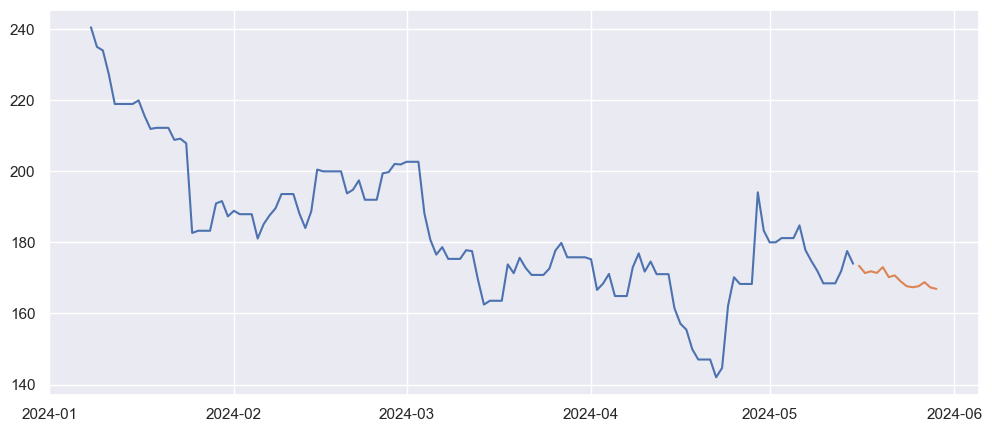

In [28]:
fig=plt.figure(figsize=(12,5))
plt.plot(apple_df)
plt.plot(sarima_model_forecast)

C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


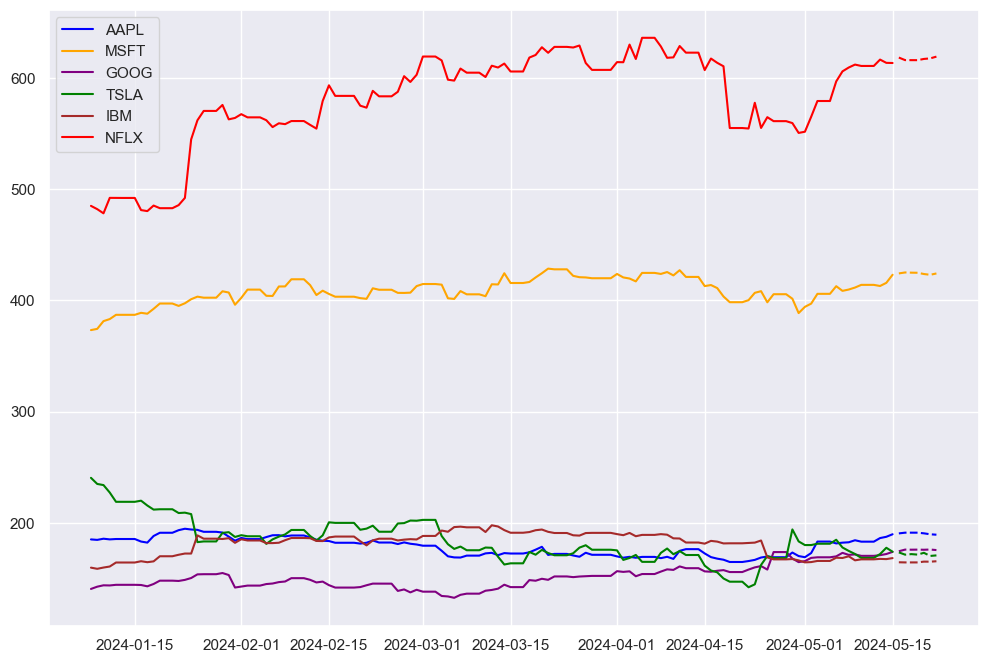

In [29]:
fig=plt.figure(figsize=(12,8))
colors=['blue','orange','purple','green','brown','red']
ticker_dfs={}
for i,ticker in enumerate(tickers):
    ticker_dfs[ticker]=multi_data['Adj Close'][ticker].iloc[-90:]
    ticker_dfs[ticker]=ticker_dfs[ticker].resample('d').ffill()
    sarima_model=SARIMAX(ticker_dfs[ticker],order=(1,1,1),seasonal_order=(1,1,1,7))
    sarima_model_fit=sarima_model.fit()
    sarima_model_forecast=sarima_model_fit.forecast(steps=7)
    plt.plot(ticker_dfs[ticker],c=colors[i],label=ticker)
    plt.plot(sarima_model_forecast,'--',c=colors[i])
plt.legend()
plt.show()

In [30]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [31]:
var_data=multi_data['Adj Close'].iloc[-90:]
var_data_diff=var_data.diff().dropna()
var_data_diff=var_data_diff.resample('d').ffill()

In [32]:
model=VAR(var_data_diff)
model_fitted=model.fit(ic='aic')

In [33]:
forecast_steps = 7

forecasted_values = model_fitted.forecast(var_data_diff.values[-model_fitted.k_ar:], steps=forecast_steps)

forecasted_df = pd.DataFrame(forecasted_values, index=pd.date_range(start=var_data_diff.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D'), columns=var_data_diff.columns)
for column in forecasted_df.columns:
    forecasted_df[column] = (list(var_data.iloc[-1:][column]) + forecasted_df[column].cumsum())

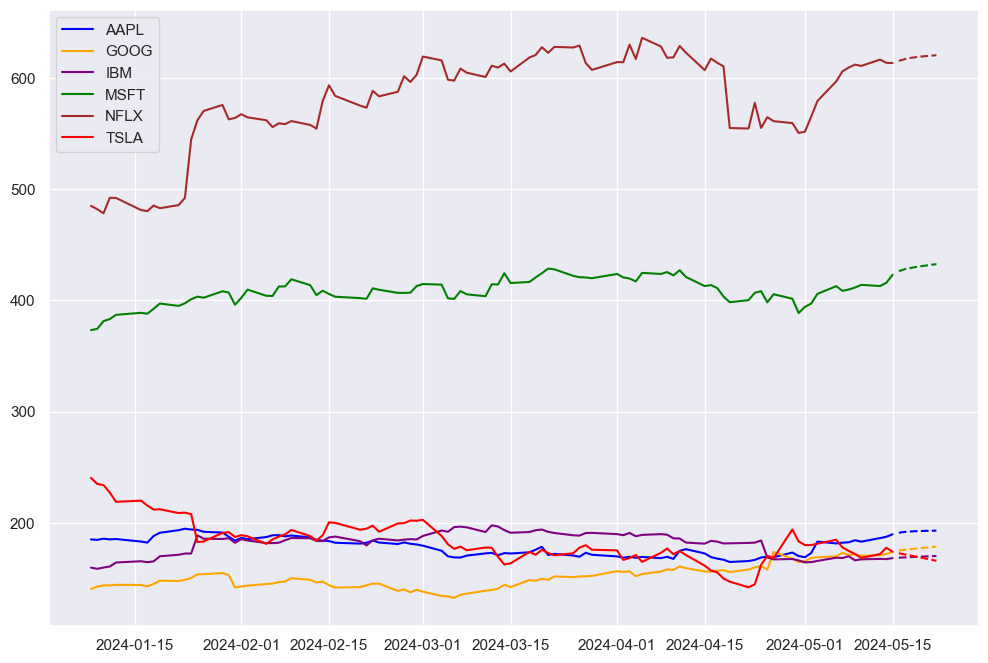

In [34]:
fig=plt.figure(figsize=(12,8))
colors=['blue','orange','purple','green','brown','red']
ticker_dfs={}
for i,ticker in enumerate(var_data.columns):
    plt.plot(var_data[ticker],c=colors[i],label=ticker)
    plt.plot(forecasted_df[ticker],'--',c=colors[i])
plt.legend()
plt.show()